# HOTH workshop

Follow along [here](https://github.com/jcaip/hoth-workshop)!

How to explore a ML problem and make a model. 

![](https://www.kdnuggets.com/wp-content/uploads/8-easy-image04.jpg)

# Getting our data


This is usually the hardest part. There's many ways to do this but 
Let's get our data first!

In [1]:
# some commands to pull our data down from the internet
!wget -c http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -zxf aclImdb_v1.tar.gz
!cat aclImdb/train/pos/0_9.txt

--2018-11-17 08:40:11--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High's satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I'm here t

In [171]:
# imports some useful packages
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn  as sns

import os

In [116]:
# want to load in all the files

train_path = 'aclImdb/train'
test_path = 'aclImdb/test'

# returns a pandas df
def load_dataset(rel_path):
    labels = os.listdir(rel_path)
    labels = filter(lambda x: os.path.isdir(os.path.join(rel_path, x)), labels)
    full_paths = [os.path.join(rel_path, label, file)
                  for label in ['pos', 'neg']
                  for file in os.listdir(os.path.join(rel_path, label))]
  
    # helper function
    def load_file(filename):
        with open(filename, 'r') as f:
            return f.read()
        
    df = pd.DataFrame(full_paths, columns=['path'])
    df['text'] = df['path'].map(load_file)
    df['label'] = df['path'].map(lambda x: x.split('/')[2])
    df['rating'] = df['path'].map(lambda x: int(x.split('_')[1].split('.')[0]))
    
    return df
    
df_train = load_dataset(train_path)
display(df_train)

df_test = load_dataset(test_path)
display(df_test)


,path,text,label,rating
0,aclImdb/train/pos/4518_9.txt,Adrian Pasdar is excellent is this film. He ma...,pos,9
1,aclImdb/train/pos/3238_9.txt,"The Finnish version of Robert Altman's ""Short ...",pos,9
2,aclImdb/train/pos/3421_10.txt,This shorter movie is the epitome the expected...,pos,10
3,aclImdb/train/pos/375_9.txt,this was one of the most moving movies i have ...,pos,9
4,aclImdb/train/pos/7563_10.txt,An independent feature can now be seen as both...,pos,10
5,aclImdb/train/pos/1175_9.txt,Match 1: Tag Team Table Match Bubba Ray and Sp...,pos,9
6,aclImdb/train/pos/10538_8.txt,"I work at a movie store, and as such, I am alw...",pos,8
7,aclImdb/train/pos/2962_7.txt,Parker and Stone transplant their pacy expleti...,pos,7
8,aclImdb/train/pos/6442_9.txt,It is a superb Swedish film .. it was the firs...,pos,9
9,aclImdb/train/pos/5453_8.txt,"In ten words or less to describe this film, Ba...",pos,8


,path,text,label,rating
0,aclImdb/test/pos/3401_10.txt,I own the miniseries on DVD because I love thi...,pos,10
1,aclImdb/test/pos/543_8.txt,Chick Flick? Of course.... Been done before? M...,pos,8
2,aclImdb/test/pos/10664_9.txt,"A milestone in cinematic history, 'Bronenosets...",pos,9
3,aclImdb/test/pos/7650_8.txt,This would definitely not have been my kind of...,pos,8
4,aclImdb/test/pos/2962_7.txt,"After seeing Meredith in ""Beyond the Prairie"" ...",pos,7
5,aclImdb/test/pos/5453_8.txt,I don't even like watching those late night ta...,pos,8
6,aclImdb/test/pos/130_9.txt,"The thing which makes ""Fire"" even more appeali...",pos,9
7,aclImdb/test/pos/4118_7.txt,This interesting film noir features three very...,pos,7
8,aclImdb/test/pos/3004_10.txt,I would give this television series a 10 plus ...,pos,10
9,aclImdb/test/pos/1069_10.txt,"I first saw this film about 15 years ago, and ...",pos,10


# Let's visualize our data!

This is really important, otherwise we won't get a sense of what we're looking for. 

There's a lot more we could do here like:
- LDA for topic modeling
- word counts/word cloud for rating or label

In [117]:
display(df_train.describe())

,rating
count,25000.000000
mean,5.477720
std,3.466477
min,1.000000
25%,2.000000
50%,5.500000
75%,9.000000
max,10.000000


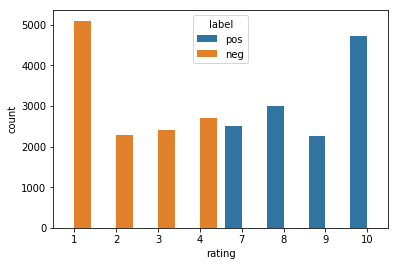

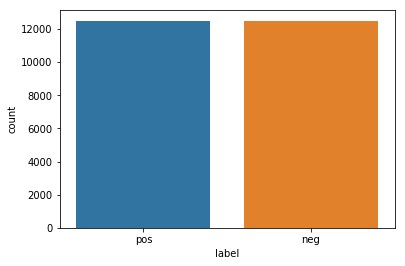

In [118]:
sns.countplot(x='rating', hue='label', data=df_train)
plt.show()
sns.countplot(x='label', data=df_train)
plt.show()

In [225]:
import gensim.downloader as api
from gensim.models import KeyedVectors
from gensim.utils import tokenize
#word_vectors = api.load("glove-wiki-gigaword-100")  # load pre-trained word-vectors from gensim-data

def process_doc(document):
    vecs = [word_vectors[word] for word in tokenize(document) if word in word_vectors]
    if len(vecs) == 0:
        return None
    return sum(vecs) / len(vecs)

df_train['embedding'] = df_train['text'].map(process_doc)

In [247]:
from sklearn.manifold import TSNE

#Takes a bit to run, so just do it on 5000 random datapoints
df_tsne = df_train.dropna().sample(5000)
tsne = TSNE(n_components=2)
X = np.stack(df_tsne['embedding'])
X_dim_red = tsne.fit_transform(X)

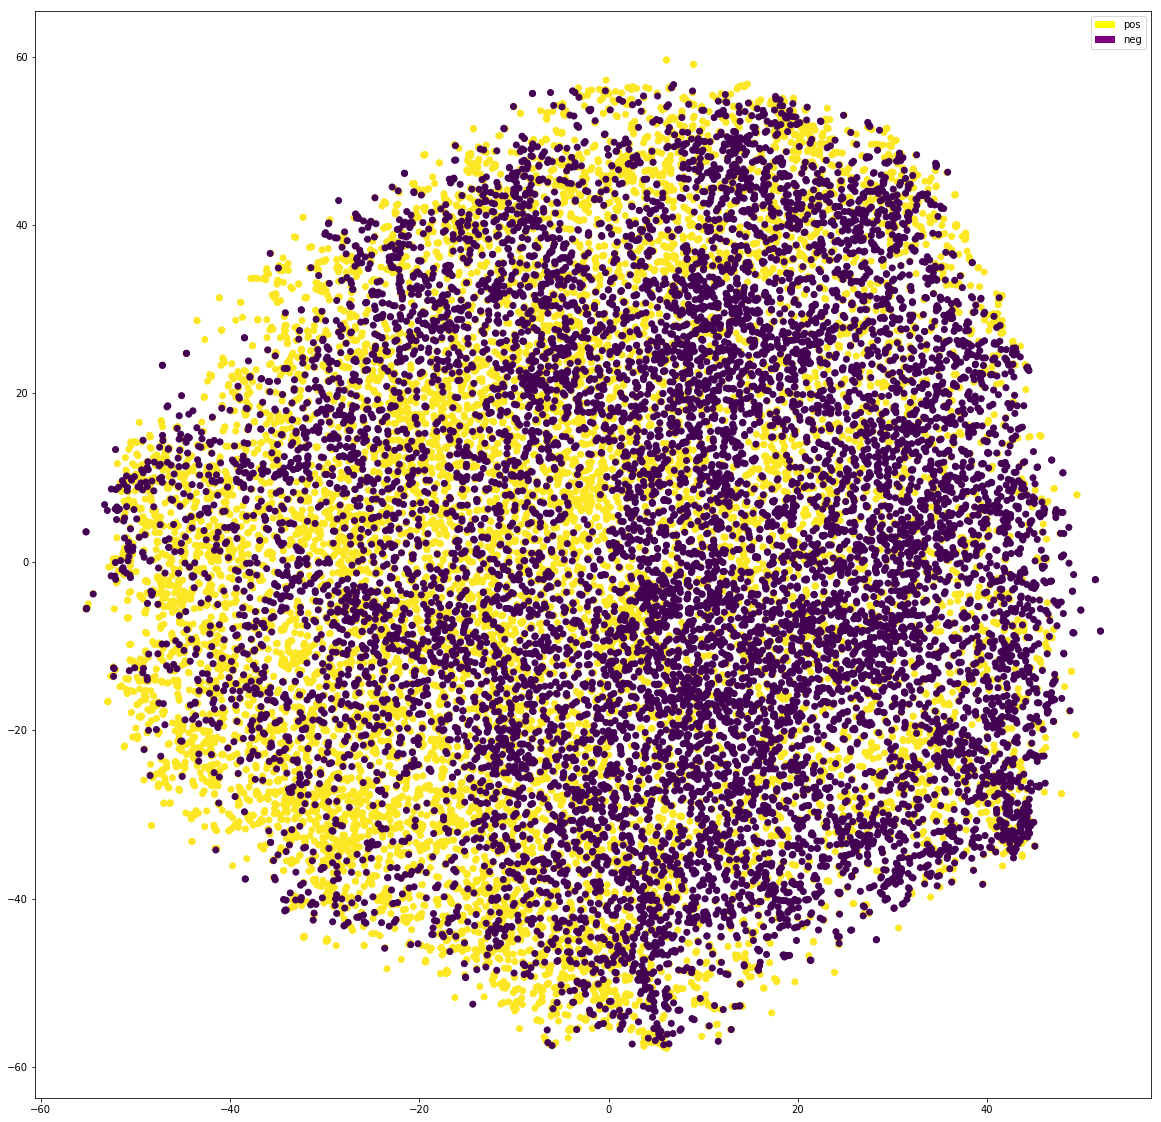

In [246]:
import matplotlib.patches as mpatches
plt.figure(figsize=(20,20))
plt.scatter(X_dim_red[:, 0], X_dim_red[:,1], c=df_tsne['label']=='pos')

recs = []
for i, color in enumerate(['yellow', 'purple']):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=color))
plt.legend(recs, ['pos', 'neg'])
plt.show()

# Fitting a model

This is the fun part!

### CountVectorizer

This simply converts our input string, which is a series of documents, into a series of vectors, so we can act on them numerically. 

### TF-IDF transformer

(term-frequency inverse document frequency). This is a measure of how "important" a word is to a document, and is usually used as a weighing factor. 

$$ TF-IDF(d, t) = TF(t) \times IDF(d, t)$$ 

where $t$ is the term and $d$ is the document.

$$IDF(d, t) = \log(\frac{n}{DF(d, t)}) + 1$$

here $n$ is the total number of documents, and $DF$ is the document frequence, or the number of documents that contain the term $t$.

### Naive-Bayes

Recall Bayes rule $$P(y \mid x)  = \frac{P(y, x)}{P(x)}$$

![naive-bayes](bn.png)

Naive bayes can be thought as a simpler Bayesian network. Here we assume all the features are independent.
- What are our features here?
- Whats $y$?
- What's $M$?


In [168]:
import logging

logging.getLogger().setLevel(logging.INFO)

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),])

pipeline.fit(df_train['text'], df_train['label'])

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [169]:
res = pd.Series(pipeline.predict(df_test['text']))
probs = pipeline.predict_proba(df_test['text'])

# Evaluating our performance

Accuracy can often be misleading, especially in the case of imbalanced datasets. 

For classification problems, we look at a host of metrics. It's important to take into account the real world implications here, as they will determine which metrics are more important.

             precision    recall  f1-score   support

        neg       0.89      0.79      0.84     13989
        pos       0.77      0.87      0.82     11011

avg / total       0.84      0.83      0.83     25000

Accuarcy: 0.82956


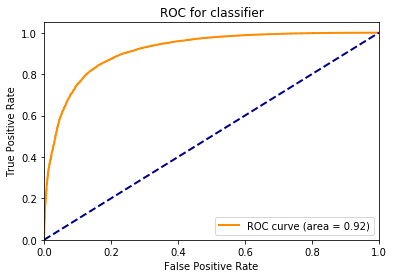

In [170]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

print(classification_report(res, df_test['label']))
print("Accuarcy: {}".format(accuracy_score(res, df_test['label'])))

# Compute ROC curve and ROC area for the classifier
fpr, tpr, thresholds = roc_curve(df_test['label'], probs[:,1], pos_label='pos')
roc_auc = auc(fpr, tpr)
    
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for classifier')
plt.legend(loc="lower right")
plt.show()

# Exporting your model and future steps

The easiest way to export is to simply create a Flask API.
This way, you can deploy your models so other people can use them!

(Check out the sample code in the Github).

Some possible ideas here:
- use a RNN or CNN / different models
- Maybe we can use word vectors as well for our classifier?
- Could we train document embeddings to improve this classification?
- We also have a bunch of unsupervised data - could we leverage that?

In [248]:
# export our model so we can load it in our flask application
from sklearn.externals import joblib

joblib.dump(pipeline, '/api/model.pkl')

['model.pkl']